# HW3

## 1
To solve the following problem using symmetry, we take original matrix and rewrite row 5 to use node 4 instead of 6 by symmetry.
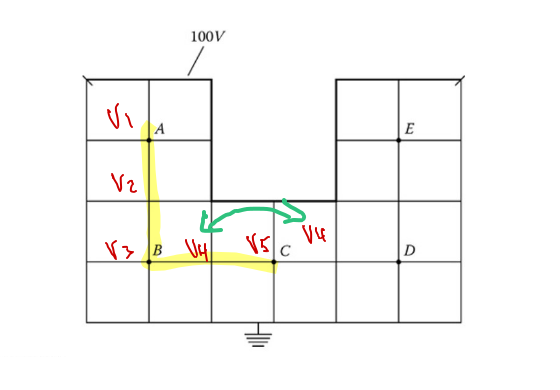

Reusing the matrix generator code from HW1, we can modify problem for symmetry. Symply replace node `V(6)` with `V(4)` and leave the rest as zeroes.

In [60]:
struct V
    id::Int
end

M =
[100  100   100   0    100  100  100;
 0    V(1)  100   0    100  0      0;
 0    V(2)  100   100  100  0      0;
 0    V(3)  V(4)  V(5) V(4) 0      0;
 0    0     0     0    0    0      0;];

function node_equation(i,j)
    R = zeros(10)

    v = M[i, j]
    R[v.id] = -4

    v_t = M[i+1, j]
    v_d = M[i-1, j]
    v_l = M[i, j-1]
    v_r = M[i, j+1]

    for v in [v_t, v_d, v_l, v_r] 
        if typeof(v) == V
            R[v.id] += 1 # FIXED: Add repeating coefficients
        else
            R[10] -= v
        end
    end

    return R
end

A = [node_equation(2,2)';
     node_equation(3,2)';
     node_equation(4,2)';
     node_equation(4,3)';
     node_equation(4,4)';]

b = A[:,10]
A = A[:,1:5]

# x = A \ b
println("b = ")
println(repr("text/plain", b)) 

println("A = ")
println(repr("text/plain", A))


b = 
5-element Vector{Float64}:
 -200.0
 -100.0
    0.0
 -100.0
 -100.0
A = 
5×5 Matrix{Float64}:
 -4.0   1.0   0.0   0.0   0.0
  1.0  -4.0   1.0   0.0   0.0
  0.0   1.0  -4.0   1.0   0.0
  0.0   0.0   1.0  -4.0   1.0
  0.0   0.0   0.0   2.0  -4.0


Solving the matrix using SOR code from HW2 yields:

In [61]:
println("Solving using SOR...")

# Matrix to solve
println("A = ")
println(repr("text/plain", A))

println("b = ")
println(repr("text/plain", b))

# relaxation
w = 1.02
println("w = ")
println(repr("text/plain", w))

# convergence criteria
e = 0.0001
println("e = ")
println(repr("text/plain", e))

x = similar(b)

for iter in 1:1000
    global x
    x_new = similar(x)

    for i in 1:length(x)
        acc = 0.0

        for j in i:size(A, 1)
            #if j != i
                acc += A[i, j] * x[j]
            #end
        end

        acc2 = 0
        for j in 1:i-1
            acc2 += A[i, j] * x_new[j]
        end
        
        x_new[i] = x[i] + w*(-(acc2 + (-b[i] + acc) ) / A[i, i])
    end

    delta = maximum(abs.(x_new .- x))

    x = x_new
    if delta[1] < e 
        break
    end
    println(string(iter), ": ", string(x))
end

x


Solving using SOR...
A = 
5×5 Matrix{Float64}:
 -4.0   1.0   0.0   0.0   0.0
  1.0  -4.0   1.0   0.0   0.0
  0.0   1.0  -4.0   1.0   0.0
  0.0   0.0   1.0  -4.0   1.0
  0.0   0.0   0.0   2.0  -4.0
b = 
5-element Vector{Float64}:
 -200.0
 -100.0
    0.0
 -100.0
 -100.0
w = 
1.02
e = 
0.0001
1: [51.0, 38.505, 9.818775, 28.003787625, 39.78193168875]
2: [59.798775, 42.48237525, 17.777596033125, 39.617603816578125, 44.90933931267985]
3: [60.637030188749996, 44.64608218157812, 21.131688008867343, 41.54810989066297, 45.79134925798452]
4: [61.17201035252742, 45.594521438524104, 21.798737228765358, 41.90450985630796, 45.95547304155737]
5: [61.4031627597731, 45.80459406830683, 21.929846756201464, 41.972666351302344, 45.98695037833305]
6: [61.452108232222784, 45.84630664068205, 21.95524117783199, 41.98580551979604, 45.99302180752932]
7: [61.46176602872947, 45.85441070485953, 21.96015031373053, 41.98834278052534, 45.99419438191734]
8: [61.46363940916459, 45.85597816524107, 21.961098834895825, 41.9

5-element Vector{Float64}:
 61.46407163711536
 45.85633957835586
 21.96131748950983
 41.988945895948824
 45.99447311374304

In [62]:
x_reference = A \ b
x_reference .- x

5-element Vector{Float64}:
 1.6760674697025024e-5
 1.4012804363972009e-5
 8.477340994517135e-6
 4.380294271300045e-6
 2.024378510157021e-6

## 2

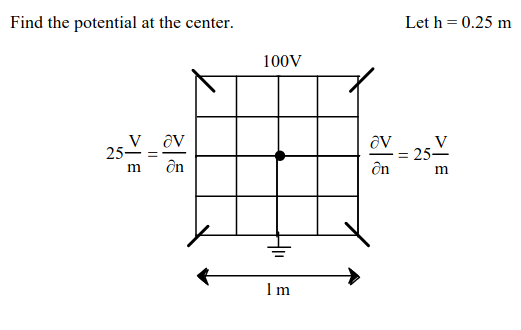


First, solve using a matrix
```
   0   0          100   100   100  0        0 ;
   0   dVdn(25)   V(1)  V(2)  V(3) dVdn(25) 0 ;
   0   dVdn(25)   V(4)  V(5)  V(6) dVdn(25) 0 ;
   0   dVdn(25)   V(7)  V(8)  V(9) dVdn(25) 0 ;
   0   0          0     0     0    0        0 ;

   0   0  100    100    100   0        0 ;
   0   0  V(2)   V(1)   V(2)  V(3)     0 ;
   0   0  V(5)   V(4)   V(5)  V(6)     0 ;
   0   0  V(8)   V(7)   V(8)  V(9)     0 ;
   0   0  0      0      0     0        0 ;

   0   0          100    100    100   0        0 ;
   0   dVdn(25)   V(2)   V(1)   V(2)  V(3)     0 ;
   0   dVdn(25)   V(5)   V(4)   V(5)  V(6)     0 ;
   0   dVdn(25)   V(8)   V(7)   V(8)  V(9)     0 ;
   0   0          0      0      0     0        0 ; 

 -4V1 + 2V2   +   V4 = -100
  V1 + -4V2   +   V3 + V5 = -100
       2*V2   +  -4V3 + V6 = -(25 * 2 * 0.25) -100
         V1   +  -4V4 + V7 + 2*V5 = 0
                  V4 + -4V5 + V2 + V8 + V6 = 0
                             2*V5 + -4V6 + V3 + V9  = -(25 * 2 * 0.25)
                          V4 +   -4V7 + 2V8 = 0
                              V5 + V7  -4V8 + V9 = 0
                                    V6 + 2V8 -4V9 =   -(25 * 2 * 0.25)

```

In [63]:
A = [
    -4   2   0   1   0   0   0   0   0;   # Eq 1
     1  -4   1   0   1   0   0   0   0;   # Eq 2
     0   2  -4   0   0   1   0   0   0;   # Eq 3
     1   0   0  -4   2   0   1   0   0;   # Eq 4
     0   1   0   1  -4   1   0   1   0;   # Eq 5
     0   0   1   0   2  -4   0   0   1;   # Eq 6
     0   0   0   1   0   0  -4   2   0;   # Eq 7
     0   0   0   0   1   0   1  -4   1;   # Eq 8
     0   0   0   0   0   1   0   2  -4    # Eq 9
]

b = [
    -100;
    -100;
    -112.5; # if no 100V above Neuman BC, then this would be -12.5
      0;
      0;
    -12.5;
      0;
      0;
    -12.5
]

A \ b

9-element Vector{Float64}:
 78.09873949579831
 79.04411764705881
 82.56302521008402
 54.30672268907561
 55.51470588235293
 59.663865546218474
 28.09873949579832
 29.044117647058822
 32.56302521008403


```
M = [
    0     0     100.0        100.0        100.0        0     0;
    0   82.5630   79.0441     78.0987     79.0441   82.5630  0;
    0   59.6639   55.5147     54.3067     55.5147   59.6639  0;
    0   32.5630   29.0441     28.0987     29.0441   32.5630  0;
    0     0        0           0           0          0     0
]
```

Now, using my SOR implementation...

In [64]:
# Direct SOR solver

h = 0.25 # m

struct V
    id::Int
end


struct dVdn
    value::Float32
end

# Model of the problem
M =
[ 0   100        100   100   100  100      0 ;
  0   dVdn(25)   V(1)  V(2)  V(3) dVdn(25) 0 ;
  0   dVdn(25)   V(4)  V(5)  V(6) dVdn(25) 0 ;
  0   dVdn(25)   V(7)  V(8)  V(9) dVdn(25) 0 ;
  0   0          0     0     0    0        0 ; ]

# Initialize result
Φ = map(x -> x isa Number ? Float64(x) : 0, M)

# Get node coordinates
nodes = Vector{Tuple}()

for I in CartesianIndices(M)
    i,j = Tuple(I)
    v = M[i, j]
    if typeof(v) == V || typeof(v) == dVdn # Add Neuman BC nodes as regular nodes for solving
        push!(nodes, Tuple(I))
    end
end

for iter in 1:1000

# Iterate over nodes where we want to find potential
for (i, j) in nodes
    local b = 0 # h^2*q_v/e 
    R = ( Φ[i+1,j] + Φ[i-1,j] + Φ[i,j+1] + Φ[i,j-1] - 4*Φ[i,j] - b )/4
    Φ[i,j] = Φ[i,j] + 1.5*R
end

# Update interpolated nodes adjacent to Neuman nodes
for j in range(1,size(Φ)[1])
    left_BC = M[j, 2]
    if left_BC isa dVdn
        Φ[j, 1] = left_BC.value*2*h + Φ[j, 3]
    end

    right_BC = M[j, size(Φ)[2]-1]
    if right_BC isa dVdn
        Φ[j, size(Φ)[2]] = right_BC.value*2*h + Φ[j, size(Φ)[2]-2]
    end

end

end

println(repr("text/plain", Φ))


5×7 Matrix{Real}:
  0.0     100.0     100.0     100.0     100.0     100.0      0.0
 91.5441   82.563    79.0441   78.0987   79.0441   82.563   91.5441
 68.0147   59.6639   55.5147   54.3067   55.5147   59.6639  68.0147
 41.5441   32.563    29.0441   28.0987   29.0441   32.563   41.5441
  0.0       0.0       0.0       0.0       0.0       0.0      0.0


**The answer matches my manual solution with a matrix. This validates my solver.**

## 3

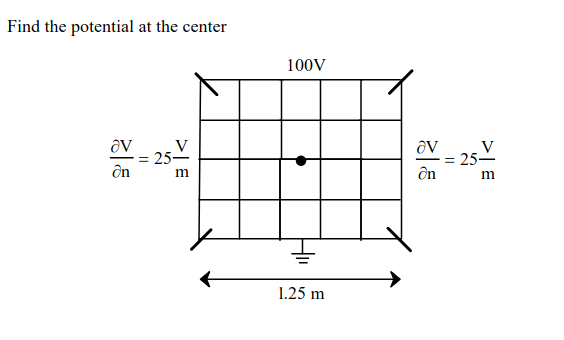


In [65]:
h = 1.25 / 5

0.25

In [66]:
# Direct SOR solver...

h = 1.25 / 5 # m

struct V
    id::Int
end


struct dVdn
    value::Float32
end

# Change problem statement, everything else the same
M =
[ 0   100       100   100      100     100     100        0 ;
  0   dVdn(25)  V(1)  V(2)     V(3)    V(4)    dVdn(25)   0 ;
  0   dVdn(25)  V(5)  V(6)     V(7)    V(8)    dVdn(25)   0 ;
  0   dVdn(25)  V(9)  V(10)    V(11)   V(12)   dVdn(25)   0 ;
  0   0         0     0        0       0       0          0 ; ]


# Initialize result
Φ = map(x -> x isa Number ? Float64(x) : 0, M)

# Get node coordinates
nodes = Vector{Tuple}()

for I in CartesianIndices(M)
    i,j = Tuple(I)
    v = M[i, j]
    if typeof(v) == V || typeof(v) == dVdn # Add Neuman BC nodes as regular nodes for solving
        push!(nodes, Tuple(I))
    end
end


for iter in 1:100

# Iterate over nodes where we want to find potential
for (i, j) in nodes
    local b = 0 # h^2*q_v/e 
    R = ( Φ[i+1,j] + Φ[i-1,j] + Φ[i,j+1] + Φ[i,j-1] - 4*Φ[i,j] - b )/4
    Φ[i,j] = Φ[i,j] + 1.5*R
    #println(i, " ", j) 
end

# Update interpolated nodes adjacent to Neuman nodes
for j in range(1,size(Φ)[1])
    left_BC = M[j, 2]
    if left_BC isa dVdn
        Φ[j, 1] = left_BC.value*2*h + Φ[j, 3]
    end

    right_BC = M[j, size(Φ)[2]-1]
    if right_BC isa dVdn
        Φ[j, size(Φ)[2]] = right_BC.value*2*h + Φ[j, size(Φ)[2]-2]
    end

end

end

println(repr("text/plain", Φ))



5×8 Matrix{Real}:
  0.0     100.0     100.0     100.0     100.0     100.0     100.0      0.0
 91.0618   82.1909   78.5618   77.2177   77.2177   78.5618   82.1909  91.0618
 67.3387   59.1398   54.8387   53.0914   53.0914   54.8387   59.1398  67.3387
 41.0618   32.1909   28.5618   27.2177   27.2177   28.5618   32.1909  41.0618
  0.0       0.0       0.0       0.0       0.0       0.0       0.0      0.0


V6 and V7 are almost equal, otherwise I would just average them in this case

In [67]:
V6 = V7 = 53.0914

53.0914